# Inventory Planning for COVID-19 Supplies (PPE and Ventilators)

# PPE KIT

In [2]:
import pandas as pd
import numpy as np

#Data:
PPE=pd.read_csv('PPE.csv')
VENTILATOR=pd.read_csv('Ventilator.csv')


PPE_data = PPE.loc[0:6,['Month', 'Stock (PPE)','Demand(PPE)','Lead Time(PPE)','Safety Stock(PPE)','RE-order with out safety stock']]
print("\n1.PPE KIT Data:\n",PPE_data)

#sum:
Total_PPE_Stock= PPE_data['Stock (PPE)'].sum()
Total_PPE_demand = PPE_data['Demand(PPE)'].sum()
Total_PPE_safety_stock = PPE_data['Safety Stock(PPE)'].sum()
PPE_ordering_cost= 800 #per Order
PPE_holding_cost= 0.22 # 22% per unit
PPE_lead_time=4 #Takes 4 days

 


EOQ_PPE = np.sqrt((2 * PPE_ordering_cost * Total_PPE_demand) / PPE_holding_cost)

Reorder_Point_PPE = (Total_PPE_demand* PPE_lead_time) + Total_PPE_safety_stock

print("\nTotal PPE Stock:", Total_PPE_Stock,'Units')
print("Total PPE Demand(R):", Total_PPE_demand,'Units')
print("Total PPE Safety Stock:", Total_PPE_safety_stock,'Units')
print("Ordering Cost (A):","Rs",PPE_ordering_cost ,'Per Order')
print("Holding Cost(h):",'Rs',PPE_holding_cost ,'Per Unit')
print("Lead Time:",PPE_lead_time ,'Days')

print(f"\nReorder Point (ROP): {round(Reorder_Point_PPE)} units")
print(f"The inventory should be replenished when the stock level drops to {int(Reorder_Point_PPE)} units of PPE kits.")


print(f"\nThe Economic Order Quantity (EOQ) is Approximately {int(EOQ_PPE)} Units")
print(f"We should order approximately {int(EOQ_PPE)} units of PPE in each replenishment cycle to minimize total inventory costs.")



1.PPE KIT Data:
        Month  Stock (PPE)  Demand(PPE)  Lead Time(PPE)  Safety Stock(PPE)  \
0      April      50000.0      12500.0             2.0             5000.0   
1        May      37500.0       7550.0             1.0             1510.0   
2       June      29950.0       5000.0             1.0             1000.0   
3       July      44950.0       7000.0             1.0             1400.0   
4     August      37950.0       4000.0             2.0             1600.0   
5  September      62390.0      10000.0             2.0             4000.0   
6    October      52390.0       6000.0             2.0             2400.0   

   RE-order with out safety stock  
0                         25000.0  
1                          7550.0  
2                          5000.0  
3                          7000.0  
4                          8000.0  
5                         20000.0  
6                         12000.0  

Total PPE Stock: 315130.0 Units
Total PPE Demand(R): 52050.0 Units
Total PPE

In [5]:
if Total_PPE_Stock < Reorder_Point_PPE:
    print("🛑 CRITICAL: Stock below reorder point! Immediate order required!")
elif Total_PPE_Stock < Reorder_Point_PPE :
    print("⚠️ WARNING: Stock approaching reorder point")
else:
    print("✅ OK: Stock levels sufficient")


✅ OK: Stock levels sufficient


# Ventilator 

In [9]:
import pandas as pd
import numpy as np

VENTILATOR=pd.read_csv('Ventilator.csv')

#VENTILATOR DATA:
VENTILATOR_data = VENTILATOR.loc[0:6, ['Month', 'Stock','Demand','Lead Time','Safety Stock']]
print("\n2.Ventilator Data:\n",VENTILATOR_data)

# Calculating the sum of Demand and Safety Stock for Ventilators:
Total_VENTILATOR_Stock= VENTILATOR_data['Stock'].sum()
Total_VENTILATOR_demand = VENTILATOR_data['Demand'].sum()
Total_VENTILATOR_safety_stock = VENTILATOR_data['Safety Stock'].sum()
VENTILATOR_ordering_cost= 25000 #per Order 
VENTILATOR_holding_cost= 0.24 # 24% per unit
VENTILATOR_lead_time=2#Takes 8 days

EOQ_VENTILATOR = np.sqrt((2 * VENTILATOR_ordering_cost * Total_VENTILATOR_demand) / VENTILATOR_holding_cost)

Reorder_Point_VENTILATOR = (Total_VENTILATOR_demand*VENTILATOR_lead_time ) 

print("\nTotal Ventilator Stock:",Total_VENTILATOR_Stock ,'Units')
print("Total Ventilator Demand:(R)", Total_VENTILATOR_demand,'Units')
print("Total Ventilator Safety Stock:", Total_VENTILATOR_safety_stock,'Units')
print("Ordering Cost (A):","Rs",VENTILATOR_ordering_cost ,'Per Order')
print("Holding Cost(h):",'Rs',VENTILATOR_holding_cost,'Per Unit')
print("Lead Time:",VENTILATOR_lead_time,'Days')

print(f"\nReorder Point (ROP): {round(Reorder_Point_VENTILATOR)} units")
print(f"The inventory should be replenished when the stock level drops to {int(Reorder_Point_VENTILATOR)} units of Ventilators.")

print(f"\nEOQ (Economic Order Quantity): {int(EOQ_VENTILATOR)} Units")
print(f"We should order approximately {int(EOQ_VENTILATOR)} units of Ventilator in each replenishment cycle to minimize total inventory costs.\n")




2.Ventilator Data:
        Month  Stock  Demand  Lead Time  Safety Stock
0      April  25000    7000          2          2800
1        May  18000    5000          1          1000
2       June  13000    8000          1          1600
3       July  19000    1000          1          2000
4     August  14000    4000          2          1600
5  September  10000    6000          2          2400
6    October  12000    2000          2          4000

Total Ventilator Stock: 111000 Units
Total Ventilator Demand:(R) 33000 Units
Total Ventilator Safety Stock: 15400 Units
Ordering Cost (A): Rs 25000 Per Order
Holding Cost(h): Rs 0.24 Per Unit
Lead Time: 2 Days

Reorder Point (ROP): 66000 units
The inventory should be replenished when the stock level drops to 66000 units of Ventilators.

EOQ (Economic Order Quantity): 82915 Units
We should order approximately 82915 units of Ventilator in each replenishment cycle to minimize total inventory costs.



# Visualisation

Pie Chart for Total Stock:



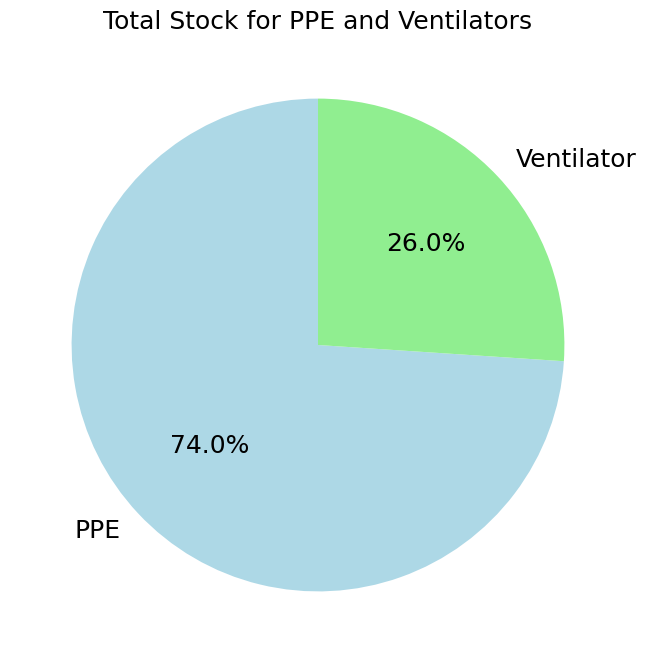


Bar Chart for Total Stock Vs Reorder Point:



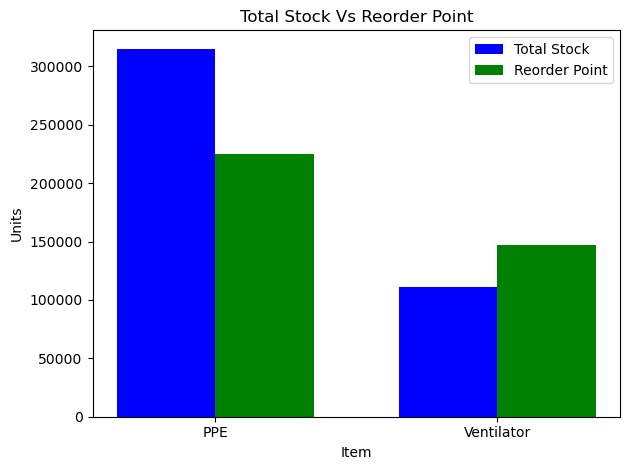

In [5]:
import matplotlib.pyplot as plt

#pie chart:
total_stock = [Total_PPE_Stock, Total_VENTILATOR_Stock]
labels_stock = ['PPE', 'Ventilator']

print('Pie Chart for Total Stock:\n')
plt.figure(figsize=(8, 8))
plt.pie(total_stock, labels=labels_stock, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], textprops={'fontsize': 18})  
plt.title('Total Stock for PPE and Ventilators', fontsize=18)
plt.show()

#Bar Chart:
reorder_point = [Reorder_Point_PPE, Reorder_Point_VENTILATOR]
labels = ['PPE', 'Ventilator']

x = np.arange(len(labels)) 
width = 0.35  

print('\nBar Chart for Total Stock Vs Reorder Point:\n')
plt.bar(x - width/2, total_stock, width, label='Total Stock', color='blue')
plt.bar(x + width/2, reorder_point,width,label='Reorder Point', color='green')
plt.xlabel('Item')
plt.ylabel('Units')
plt.title('Total Stock Vs Reorder Point')
plt.xticks(x, labels)  # Set x-ticks to match the labels
plt.legend()
plt.tight_layout()
plt.show()
